In [1]:
import pandas as pd
import re
import datetime
import json
from datetime import datetime
import time
import seaborn as sb
import matplotlib.pyplot as plt

#importorting libraries for NLP
from nltk.corpus import stopwords
stop = stopwords.words('english')
from textblob import TextBlob
import string
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()


#importing librraies for data modelling 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from mlxtend.evaluate import bias_variance_decomp
import xgboost as xg



profile=pd.read_csv('instagram_profiles.csv')
profile_post=pd.read_csv('instagram_posts.csv')

# Basic EDA for Instagram Profiles Data  

In [74]:
profile.shape

(537, 10)

In [418]:
profile.columns

Index(['ig_id', 'username', 'metadata', 'followers', 'follows',
       'total_post_count', 'crawled', 'created_at', 'updated_at',
       'app_crawled'],
      dtype='object')

In [76]:
profile.head()

,ig_id,username,metadata,followers,follows,total_post_count,crawled,created_at,updated_at,app_crawled
0,1181592320,randomvarun,"{""name"": ""Kumar Varun"", ""website"": ""https://yo...",152812,587,340,2023-03-28,2022-09-28 05:09:43.975459+00,2022-09-28 05:09:43.975459+00,2023-02-07 14:53:13+00
1,290516871,ig_mamba,"{""name"": ""Salman Ahmad"", ""website"": """", ""biogr...",455664,287,300,2023-03-28,2023-03-01 10:55:39.567239+00,2023-03-01 10:55:39.567239+00,NaN
2,4483453272,wakefitco,"{""name"": ""Wakefit Solutions"", ""website"": ""http...",66918,31,1592,2022-12-01,2022-12-01 10:24:18.006169+00,2022-12-01 10:24:18.006169+00,2023-01-18 18:09:23+00
3,456967256,kennethseb,"{""name"": ""Kenny Sebastian"", ""website"": ""https:...",1081986,588,1078,2023-03-28,2022-09-28 05:09:45.544014+00,2022-09-28 05:09:45.544014+00,2023-02-07 15:04:15+00
4,1173736368,danishsait,"{""name"": ""Danish sait"", ""website"": ""http://www...",1244607,697,1929,2022-09-27,2022-08-25 06:52:11.044415+00,2022-08-25 06:52:11.044415+00,2023-01-18 18:25:11+00


In [2]:
#columns with object data type
Numerical=profile.dtypes[profile.dtypes=="int64"].index
Numerical

Index(['ig_id', 'followers', 'follows', 'total_post_count'], dtype='object')

In [3]:
#columns with int data type
categorical=profile.dtypes[profile.dtypes=="object"].index
categorical

Index(['username', 'metadata', 'crawled', 'created_at', 'updated_at',
       'app_crawled'],
      dtype='object')

In [82]:
profile_copy=profile.copy()
profile_copy.drop("ig_id",axis=1,inplace=True)
profile_copy.describe(include=[np.number])

,followers,follows,total_post_count
count,5.370000e+02,537.000000,537.000000
mean,1.322691e+06,753.329609,1308.165736
std,5.074680e+06,942.460418,1315.261425
min,1.370000e+02,0.000000,0.000000
25%,7.688700e+04,152.000000,422.000000
50%,2.930930e+05,490.000000,925.000000
75%,9.495480e+05,995.000000,1715.000000
max,8.770702e+07,6364.000000,10324.000000


# Basic EDA for Instagram Profiles Post Data  

In [83]:
profile_post.shape

(63727, 13)

In [420]:
profile_post.columns

Index(['ig_id', 'post_id', 'permalink_url', 'metadata', 'comments', 'likes',
       'crawled', 'created_at', 'updated_at', 'slug', 'views', 'plays',
       'hashtags', 'timestamp', 'Caption', 'Text_Caption', 'No_of_Hashtags',
       'day_of_week', 'Hour', 'post_type', 'Time_of_day',
       'asking_question_in_caption'],
      dtype='object')

In [84]:
profile_post.head()

,ig_id,post_id,permalink_url,metadata,comments,likes,crawled,created_at,updated_at,slug,views,plays,hashtags
0,695431428,17951452121135417,https://www.instagram.com/reel/ClRAHEkJrIN/,"{""type"": ""VIDEO"", ""caption"": ""Problem of Every...",160,11359,2023-02-07,2022-11-22 14:59:24.479204+00,2022-11-22 14:59:24.479204+00,ClRAHEkJrIN,0,0,NaN
1,3114552540,17919790229430698,https://www.instagram.com/reel/Cgt-wnvBl7x/,"{""type"": ""VIDEO"", ""caption"": ""Is starbucks ove...",528,190695,2023-02-07,2023-01-13 11:29:13.752286+00,2023-01-13 11:29:13.752286+00,Cgt-wnvBl7x,2583796,4362765,"{funny,funnyvideos,starbucks,relatablememes}"
2,695431428,17906273285693178,https://www.instagram.com/reel/CmwIATFtAeq/,"{""type"": ""VIDEO"", ""caption"": ""Boys will be Con...",506,26173,2023-02-07,2022-12-29 17:29:34.072072+00,2022-12-29 17:29:34.072072+00,CmwIATFtAeq,0,0,NaN
3,210917789,18348198751004047,https://www.instagram.com/reel/CpcGEnfLeNa/,"{""type"": ""VIDEO"", ""caption"": ""All the best to ...",61,3848,2023-03-28,2023-03-06 09:56:58.910507+00,2023-03-06 09:56:58.910507+00,CpcGEnfLeNa,0,0,"{loveyouram,undalaniundhi,telugusong}"
4,52685013142,18313939324067862,https://www.instagram.com/p/Ck6FuFrp9TC/,"{""type"": ""CAROUSEL_ALBUM"", ""caption"": ""Should ...",604,164581,2023-03-28,2023-01-18 11:32:43.549401+00,2023-01-18 11:32:43.549401+00,Ck6FuFrp9TC,0,0,"{aesthetic,nature,photography,softpicture,vars..."


In [86]:
#columns with object data type
Numerical=profile_post.dtypes[profile_post.dtypes=="int64"].index
Numerical

Index(['ig_id', 'post_id', 'comments', 'likes', 'views', 'plays'], dtype='object')

In [88]:
categorical=profile_post.dtypes[profile_post.dtypes=="object"].index
categorical

Index(['permalink_url', 'metadata', 'crawled', 'created_at', 'updated_at',
       'slug', 'hashtags'],
      dtype='object')

In [90]:
profile_post_copy=profile_post.copy()
profile_post_copy.drop("post_id",axis=1,inplace=True)
profile_post_copy.describe(include=[np.number])

,ig_id,comments,likes,views,plays
count,6.372700e+04,63727.000000,6.372700e+04,6.372700e+04,6.372700e+04
mean,6.599213e+09,369.885653,6.617033e+04,1.578315e+05,2.961977e+05
std,1.282426e+10,2398.704818,1.964479e+05,7.082733e+05,1.378904e+06
min,2.246390e+05,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.786870e+08,16.000000,1.229000e+03,0.000000e+00,0.000000e+00
50%,1.797721e+09,75.000000,1.260400e+04,0.000000e+00,0.000000e+00
75%,4.795288e+09,259.000000,5.506050e+04,1.993550e+04,4.200300e+04
max,5.492189e+10,518882.000000,7.120823e+06,2.752564e+07,1.107832e+08


# Feature Engineering for Profile Data 

In [2]:
profile_post['hashtags'].fillna(0,inplace=True)
meta_list=list(profile_post['metadata'])
time_list=[]
caption_list=[]
text_caption_list=[]
hashtag_list=[]
day_of_week_list=[]
hour_list=[]
post_type_list=[]
asking_question_in_caption_list=[]

def timestamp(i,j):
    
    global time_list
    global caption_list
    global text_caption_list
    global hashtag_list
    global day_of_week_list
    global hour_list
    global post_type_lists
    global asking_question_in_caption_list
    
    res = json.loads(i)
    time_value=res['timestamp']
    post_type=res["type"]
    day_of_week=pd.Timestamp(time_value).dayofweek
    hour_of_day=pd.Timestamp(time_value).hour
    day_of_week_list.append(day_of_week)
    hour_list.append(hour_of_day)
    post_type_list.append(post_type)
    
    
    if 'caption' in list(res.keys()):
        caption_value=res['caption']
        text=caption_value.split('\n')[0]
        if '?' in text:
            asking_question_in_caption_list.append('Yes')
        else:
            asking_question_in_caption_list.append('No')
       
        text_caption_list.append(text)
        caption_list.append(caption_value)
        time_list.append(time_value)
    else:
        time_list.append(time_value)
        caption_list.append('No Caption')
        text_caption_list.append('No Caption')
        asking_question_in_caption_list.append('No')
    if j!=0:
        no_of_hashtags=len(j.strip('{}').split(','))
        hashtag_list.append(no_of_hashtags)
    else:
        no_of_hashtags=0
        hashtag_list.append(no_of_hashtags)
        
    

profile_post.apply(lambda x: timestamp(x['metadata'],x['hashtags']),axis=1)
profile_post['timestamp']=time_list
profile_post['Caption']=caption_list
profile_post['Text_Caption']=text_caption_list
profile_post['No_of_Hashtags']=hashtag_list
profile_post['day_of_week']=day_of_week_list
profile_post['Hour']=hour_list
profile_post['post_type']=post_type_list
profile_post['asking_question_in_caption']=asking_question_in_caption_list

In [3]:
import numpy as np
#New Variable: Time_of_day
conditions = [
    (profile_post['Hour'] >= 0)&(profile_post['Hour']<=4),
    (profile_post['Hour'] > 4 )&( profile_post['Hour'] <= 12),
    (profile_post['Hour'] > 13 )& (profile_post['Hour'] <= 16),
    (profile_post['Hour'] > 16) & (profile_post['Hour'] <= 21),
    (profile_post['Hour'] > 21) & (profile_post['Hour'] <= 24)]

# create a list of the values we want to assign for each condition
values = ['Early Morning', 'Morning', 'Afternoon', 'Evening','Night']

# create a new column and use np.select to assign values to it using our lists as arguments
profile_post["Time_of_day"] = np.select(conditions, values)   

In [4]:
#creating and merging data 
final_creater_dataframe=profile_post.merge(profile,on='ig_id')
final_creater_dataframe = final_creater_dataframe.sort_values(by=["ig_id","timestamp"])

#creating a new feature for average comments 
final_creater_dataframe['Avg_comments']=final_creater_dataframe.groupby('username')['comments'].transform('mean')

#creating a new feature for average likes
final_creater_dataframe['Avg_likes']=final_creater_dataframe.groupby('username')['likes'].transform('mean')


# Feature Engineering using NLP - Sentiment Analyisis

In [5]:

#removing stop words
final_creater_dataframe['Text_Caption'] = final_creater_dataframe['Text_Caption'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#removing puncuations
final_creater_dataframe['Text_Caption'] = final_creater_dataframe['Text_Caption'].str.replace('[{}]'.format(string.punctuation), '')

#lowercasing the words
final_creater_dataframe['Text_Caption'] = final_creater_dataframe['Text_Caption'].str.lower()

#lemmetizations 
final_creater_dataframe['Text_Caption'] = final_creater_dataframe['Text_Caption'].apply(lambda x: ' '.join([lmtzr.lemmatize(word,'v')                                                                                             
                                                          for word in x.split() ]))

#Setiment Analyis
final_creater_dataframe['Text_Caption'] = final_creater_dataframe['Text_Caption'].astype(str)

# compute sentiment scores (polarity) and labels
sentiment_scores = [round(TextBlob(var).sentiment.polarity, 3) for var in final_creater_dataframe['Text_Caption']]
sentiment_category = ["positive" if score >= 0  else "negative"  for score in sentiment_scores ]
final_creater_dataframe['Post_Sentiments']=sentiment_category

C:\Users\Ipshita\AppData\Local\Temp/ipykernel_32176/4258770116.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  final_creater_dataframe['Text_Caption'] = final_creater_dataframe['Text_Caption'].str.replace('[{}]'.format(string.punctuation), '')


# Biavariate Analysis 

C:\Users\Ipshita\AppData\Local\Temp/ipykernel_32176/2716237174.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = final_creater_dataframe.corr()


['likes' 'Avg_likes' 'followers' 'Avg_comments' 'views' 'plays' 'comments'
 'day_of_week' 'Hour' 'total_post_count']


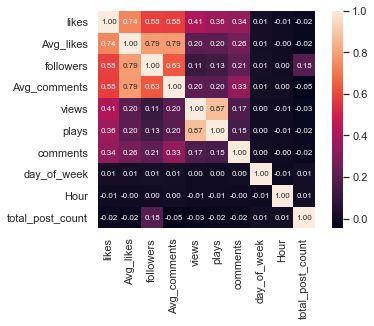

In [6]:
#corelation matrix for top 10 features for like
corrmat = final_creater_dataframe.corr()
k=10
cols=corrmat.nlargest(10,'likes')['likes'].index
print(cols.values)
cm=np.corrcoef(final_creater_dataframe[cols].values.T)
sb.set(font_scale=1)
hm = sb.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 8},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

C:\Users\Ipshita\AppData\Local\Temp/ipykernel_32176/653026658.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat =final_creater_dataframe.corr()


['comments' 'likes' 'Avg_comments' 'Avg_likes' 'followers' 'views' 'plays'
 'day_of_week' 'Hour' 'follows']


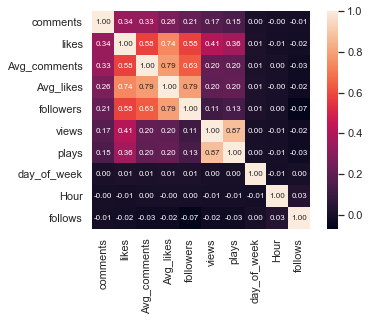

In [7]:
corrmat =final_creater_dataframe.corr()
k=10
cols=corrmat.nlargest(10,'comments')['comments'].index
print(cols.values)
cm=np.corrcoef(final_creater_dataframe[cols].values.T)
sb.set(font_scale=1)
hm = sb.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 8},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

# Image Feature

In [8]:
Image_Feature=pd.read_csv('Image_feature.csv')
final=pd.merge(final_creater_dataframe,Image_Feature,on='username')

# Label Encoding

In [9]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
final['username']= label_encoder.fit_transform(final['username'])
final['Post_Sentiments']= label_encoder.fit_transform(final['Post_Sentiments'])
final['Time_of_day']=label_encoder.fit_transform(final['Time_of_day'])
final['post_type']=label_encoder.fit_transform(final['post_type'])
final['asking_question_in_caption']=label_encoder.fit_transform(final['asking_question_in_caption'])
final['brigntness']=label_encoder.fit_transform(final['brightness'])


In [10]:
final.drop(['crawled_y','app_crawled','metadata_x','metadata_y','slug','created_at_y','updated_at_y','crawled_y','hashtags','crawled_x','Caption','Text_Caption','permalink_url', 'created_at_x', 'updated_at_x', 'timestamp','post_id'],axis=1,inplace=True)

In [12]:
#spliting the data for train and test 
test = final.groupby('ig_id').tail(5)
final.drop(final.groupby('ig_id').tail(5).index, axis=0,inplace=True)

# Predict no of like in a post

In [19]:
#----------train data-------------------------- 
x_train = final[[ 'No_of_Hashtags',
       'day_of_week',  'Post_Sentiments','Time_of_day','post_type','followers','brightness','face_detection']]
y_train=final['likes']

#--------test data------------------------------
test_x= test[[ 'No_of_Hashtags','day_of_week',  'Post_Sentiments','Time_of_day','post_type','followers','brightness','face_detection']]

test_y =test['likes']

# Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(test_x)

sc_Y = StandardScaler()
y_train=y_train.values.reshape(-1,1)
sc_Y.fit_transform(y_train)
y_train=sc_Y.transform(y_train)
y_test=test_y.values.reshape(-1,1)
y_test=sc_Y.transform(y_test)

In [22]:
x_train.shape

(61085, 8)

In [23]:
y_train.shape

(61085, 1)

# Model Buidling : Random Forest

In [179]:
from sklearn.ensemble import RandomForestRegressor
classifier_rf = RandomForestRegressor(random_state=50, n_jobs=-1, max_depth=4,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(x_train, y_train)

C:\Users\Ipshita\AppData\Local\Temp/ipykernel_13048/3725149578.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_rf.fit(x_train, y_train)


RandomForestRegressor(max_depth=4, n_jobs=-1, oob_score=True, random_state=50)

# Evaluation Meterics

In [180]:

pred = classifier_rf.predict(x_test)
print("Test: Accuracy",classifier_rf.score(x_test,y_test))
print("Train Accuracy",classifier_rf.score(x_train,y_train))

def linear_metrics():
    
    r2  = classifier_rf.score(x_test, y_test)
    MAE = metrics.mean_absolute_error(y_test,pred)
    MSE = metrics.mean_squared_error(y_test,pred) 
    RMSE= (np.sqrt(metrics.mean_squared_error(y_test,pred)))
    adjusted_r_squared = 1 - (1-r2)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
    VIF= 1/(1-r2)
    
    print('r-squared: {}'.format(r2))
    print('adjusted r square :{}'.format(adjusted_r_squared))
    print('VIF: {}'.format(VIF))
    
    print('---------------------------------------')
    print('Mean absolute error: {}'.format(MAE))
    print('Mean squared error : {}'.format(MSE))
    print('Root mean squared error: {}'.format(RMSE))
    
linear_metrics()

Test: Accuracy 0.5625022175362735
Train Accuracy 0.5087451965470191
r-squared: 0.5625022175362735
adjusted r square :0.5624449121747614
VIF: 2.285725871268642
---------------------------------------
Mean absolute error: 0.25030575457075804
Mean squared error : 0.6879557373035037
Root mean squared error: 0.8294309719943569


# Predict no of comments 

In [24]:
#----------train data-------------------------- 
x_train = final[[ 'No_of_Hashtags', 'followers',
       'day_of_week', 'username', 'Avg_comments', 'Post_Sentiments','Time_of_day','post_type','brightness','face_detection']]
y_train=final['comments']
#converting pandas dataframe to series
#y_train=y_train.squeeze()

#--------test data------------------------------
test_x= test[['No_of_Hashtags','followers',
       'day_of_week',  'username', 'Avg_comments', 'Post_Sentiments','Time_of_day','post_type','brightness','face_detection']]

test_y =test['comments']


# Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(test_x)

sc_Y = StandardScaler()
y_train=y_train.values.reshape(-1,1)
sc_Y.fit_transform(y_train)
y_train=sc_Y.transform(y_train)
y_test=test_y.values.reshape(-1,1)
y_test=sc_Y.transform(y_test)

# Model Training

In [26]:
#from sklearn.ensemble import RandomForestRegressor
#classifier_rf = RandomForestRegressor(random_state=50, n_jobs=-1, max_depth=4,
#                                       n_estimators=100, oob_score=True)

#classifier_rf.fit(x_train, y_train)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=4, n_jobs=-2, max_depth=7,
                                       n_estimators=50, oob_score=True)

rf.fit(x_train, y_train)

C:\Users\Ipshita\AppData\Local\Temp/ipykernel_32176/2304720942.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestRegressor(max_depth=7, n_estimators=50, n_jobs=-2, oob_score=True,
                      random_state=4)

# Evaluation meterics

In [27]:

pred = rf.predict(x_test)
print("Test: Accuracy",rf.score(x_test,y_test))
print("Train Accuracy",rf.score(x_train,y_train))

def linear_metrics():
    
    r2  = rf.score(x_test, y_test)
    MAE = metrics.mean_absolute_error(y_test,pred)
    MSE = metrics.mean_squared_error(y_test,pred) 
    RMSE= (np.sqrt(metrics.mean_squared_error(y_test,pred)))
    adjusted_r_squared = 1 - (1-r2)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
    VIF= 1/(1-r2)
    
    print('r-squared: {}'.format(r2))
    print('adjusted r square :{}'.format(adjusted_r_squared))
    print('VIF: {}'.format(VIF))
    
    print('---------------------------------------')
    print('Mean absolute error: {}'.format(MAE))
    print('Mean squared error : {}'.format(MSE))
    print('Root mean squared error: {}'.format(RMSE))
    
linear_metrics()

Test: Accuracy 0.47766313248422043
Train Accuracy 0.4113826485189529
r-squared: 0.47766313248422043
adjusted r square :0.4775776072414796
VIF: 1.9144733259131674
---------------------------------------
Mean absolute error: 0.11083441659471745
Mean squared error : 0.129090964571792
Root mean squared error: 0.35929231076073975
